# The criminal netwrok analysis

The data and the project were originally part of the course [MITx 6.419x Data Analysis: Statistical Modeling and Computation in Applications](https://www.edx.org/course/statistics-computation-and-applications)

The data describes the evolution of the criminal network split into phases. During first 3 pahses there was no intervention by the police. The intervention were in the form of seizing the drugs without arresting the members of the netwrok. This acctions created disturbances in the network forcing them to change the shape and properties of the network.


In [50]:
import numpy as np
import pandas as pd
import networkx as nx
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pygraphviz as pgv
import graphviz as gv
import warnings
warnings.filterwarnings("ignore")


In [71]:
# loading the data and transfroming to the graph representation using the networkX library
phases = {}
G = {}
A = {}
# looping through phases 
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  # creatiing networkX graph
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  # calculating degree centrality ot be used as size he nodes
  degree_c = nx.degree_centrality(G[i])
  # setting attributes of the nx graph
  nx.set_node_attributes(G[i], degree_c, "size")
  A[i] = nx.nx_agraph.to_agraph(G[i])
  # Setting node size attribute in pygraphviz object
  for node in A[i].nodes():
      node.attr['width'] = node.attr['size'] * 100
      node.attr['height'] = node.attr['size'] * 100




<ipython-input-76-80feb92a459d>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


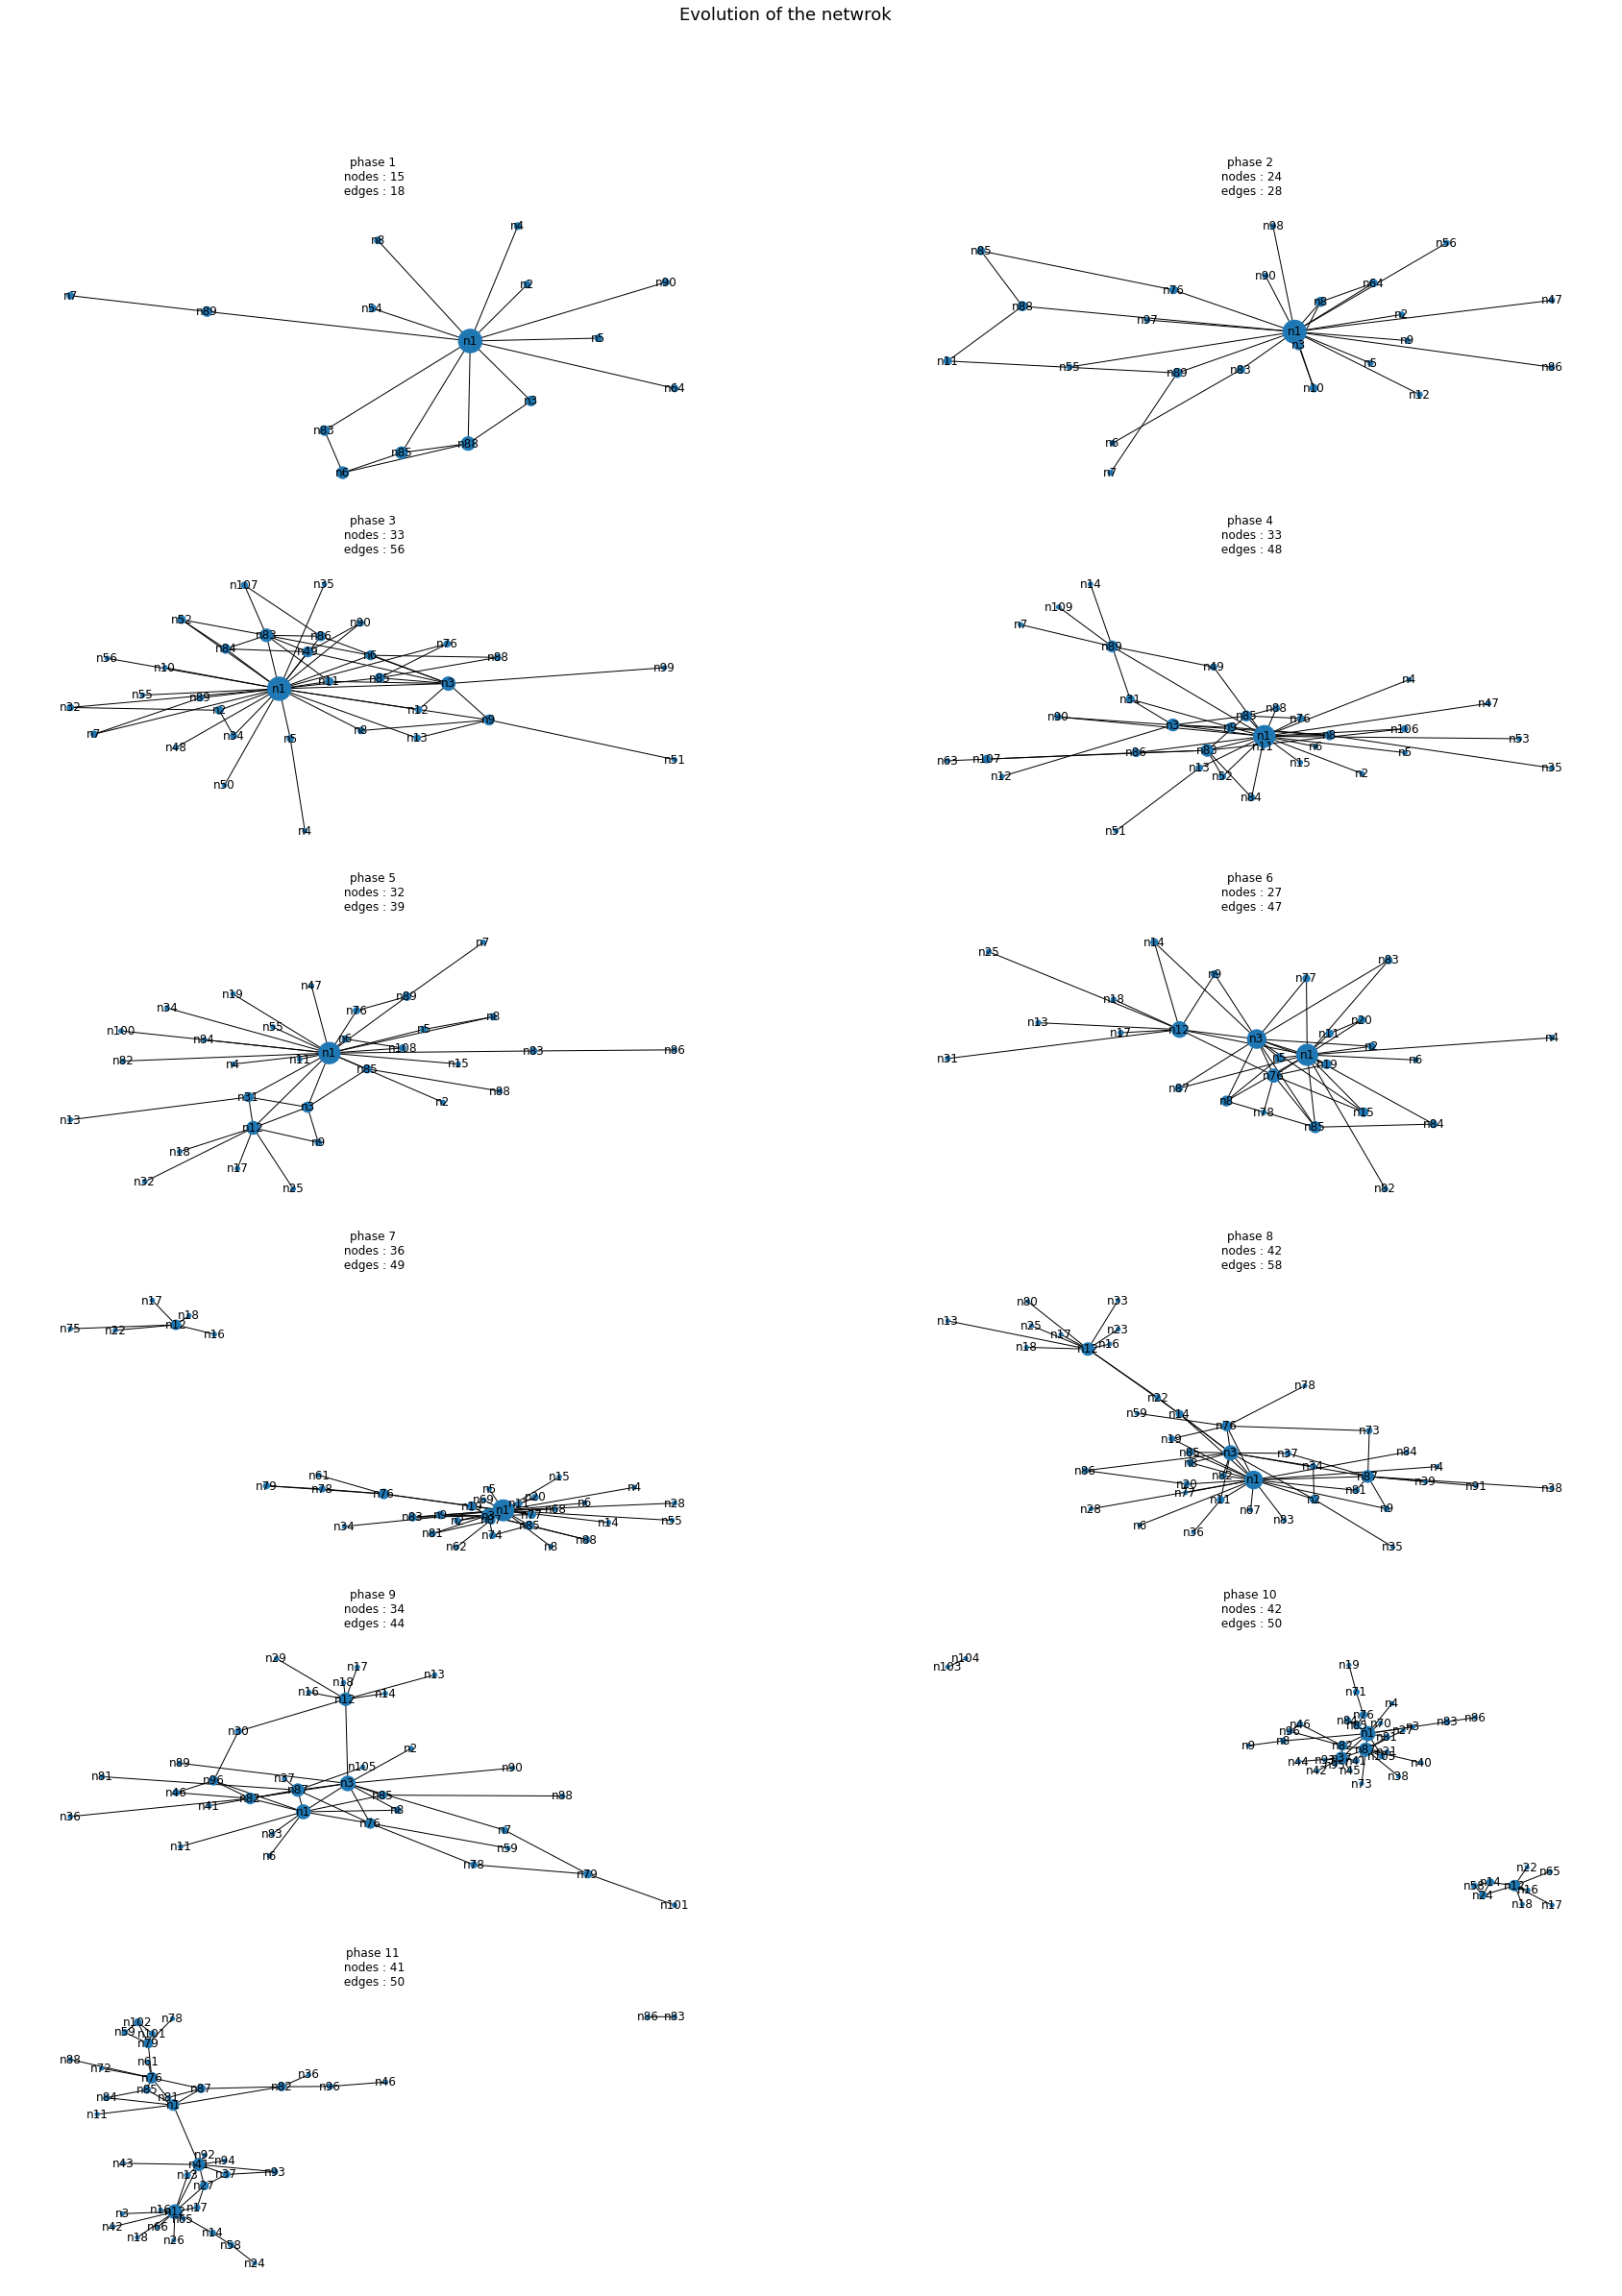

In [76]:
# creating plot grid
fig, axs = plt.subplots(squeeze=True,nrows=6, ncols=2, figsize=(30, 40),)
fig.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Evolution of the netwrok", fontsize=18, y=0.95)

# loop throught the phases and draw them 
for i, ax in zip(range(len(A)), axs.ravel()):
    ax.set_title(f"phase {i+1}" + "\n" + f" nodes : {G[i+1].number_of_nodes()}"+ "\n" +
                 f" edges : {G[i+1].number_of_edges()}" )
    ns = nx.degree_centrality(G[i+1]) # get the degree centrality for each node
    nx.draw(G[i+1], with_labels=True, ax=ax,node_size=[i*700 for i in ns.values()])
    # convert to pygraphviz for better visualization later
    A[i+1].layout()
    A[i+1].draw('networkx_graph.png')


fig.delaxes(axs[5,1]) # delete the empty ax in fig
fig.show()

Above we could see how the criminal netwrok was evolving. During the first 3 phases we can notice large increase in the size. The number of nodes representing the actors in the network more than doubled
We could speculated about why is that. One possibility is to attribute this behavior of the netwrok to lack of police intervention in this period

We can have a better look at these 3 phases 
The size of the node represents the degree centrality of the node

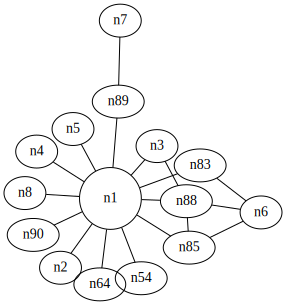

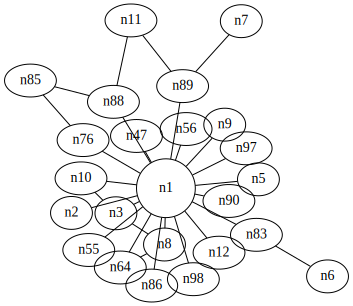

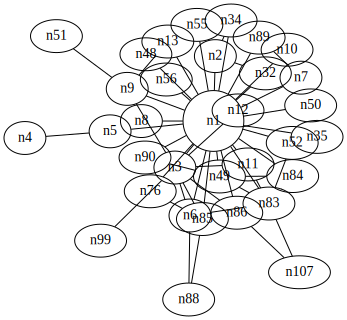

0.84722
0.72675
0.72675
0.58926
0.58926
0.72675
0.72675
0.72675
0.72675
0.58926
0.58926
0.58926
0.58926
0.72675
0.72675
0.72675
0.72675
0.58926
0.72675
0.72675
0.72675
0.72675
0.72675
0.72675
0.72675
0.72675
0.72675
0.72675
0.86424
0.72675
0.72675
0.58926
0.72675


In [74]:
display(A[1])
display(A[2])
display(A[3])
